# TxtPrePro: Preprocessing of srcaping Text Data for Text Analysis models to making Business Decision

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [10]:
# Scraping the text from websites and save the text to the local text

lineCount = 0
paragraphsCount = []
paragraphs = []
listCount = []
# with open(r'C:\Users\Emad-Laptop\Downloads\Links.txt','r') as txt:
with open(r'Links.txt','r') as txt:
    for line in txt:
        page = requests.get(line.strip())
        soup = BeautifulSoup(page.content, 'html.parser') # Extract contect
#         print(f'Number of paragraphs is :  {len(soup.find_all("p"))}')
        paragraphsCount.append(len(soup.find_all("p")))
        lineCount += 1
        listCount.append(lineCount)
        FileName = str(lineCount)
        FileName = 'TextPreprocessing\\Text\\'+FileName+'.txt'
        f = open(FileName,'w',encoding = 'utf-8')
        for i in range(len(soup.find_all('p'))) : 
            text = soup.find_all('p')[i].get_text() 
            paragraphs.append(text)
            f.write(soup.find_all('p')[i].get_text())
            f.write('\n')
        f.close()



In [11]:
print(lineCount)

8


In [12]:
dataFrame = pd.DataFrame(paragraphs)
dataFrame

,0
0,Get ₹ 5000 welcome voucher on login. Download ...
1,Samsung and Cookies
2,This site uses cookies. By clicking ACCEPT or...
3,Choose your location or language
4,Galaxy Z Fold4 | Z Flip4
...,...
795,\n · The shipment of pre-order products...
796,Refunds and exchanges instructions:
797,\n · After-sales service applies only t...
798,"\n 9:00 am - 9:00 pm, Mon to Sun\..."


https://www.samsung.com/in/smartphones/galaxy-z-flip4/

https://www.apple.com/in/shop/buy-iphone/iphone-13

https://www.mi.com/global/product/redmi-note-11-pro/

https://en.wikipedia.org/wiki/Albert_Einstein

https://www.bbc.co.uk/news/world-latin-america-57750358

https://en.wikipedia.org/wiki/Egypt

http://uni-mysore.ac.in/english-version/about-uom

https://www.oneplus.in/oneplus-nord-2t-5g?sku=5011102062


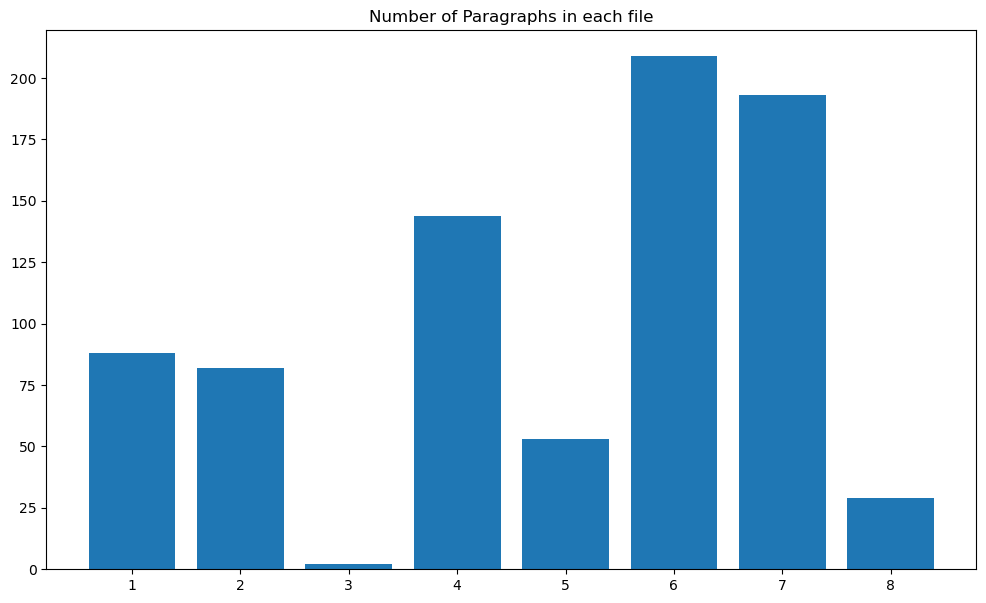

In [13]:
with open(r'C:\Users\Emad-Laptop\Downloads\Links.txt','r') as txt:
    for line in txt:
        print(line)
fig, ax = plt.subplots(figsize=(12, 7))
plt.bar(listCount,paragraphsCount)
ax.set_title("Number of Paragraphs in each file")
plt.show()

In [14]:
# Add all text files to one corpus
import glob
import os

file_list = glob.glob(os.path.join(os.getcwd(), "TextPreprocessing\\Text\\", "*.txt"))
corpus = []
for file_path in file_list:
    with open(file_path, mode="r", encoding="utf-8") as f_input:
        corpus.append(f_input.read())
        f_input.close()
len(corpus)
print(corpus[0])

Get ₹ 5000 welcome voucher on login. Download the app now.
Samsung and Cookies
 This site uses cookies. By clicking ACCEPT or continuing to browse the site you are agreeing to our use of cookies. 

		            Find out more here

Choose your location or language
Galaxy Z Fold4 | Z Flip4
Let's Do Neo QLED 8K
Bespoke Refrigerators
 
 
Do the SmartThings!
The Freestyle & Sound Tower
 


Your cart is empty.
Sorry, there is insufficient stock for your cart.
Remove a Product
Without this product, applied coupon or promotion code cannot be redeemed.

					Are you sure to remove this product?
Privacy Policy
Tick this box to proceed to Samsung.com.
Samsung.com Services and marketing information, new product and service announcements as well as special offers, events and newsletters.
Check Preferences
Help us to make recommendations for you by updating your product preferences.
What are you looking for?
Suggested Searches
No Suggestions
Search History
Related Searches
Matched Contents

Experie

In [15]:
# Counting the stop words included in the corpus
stopWords = set(stopwords.words('english'))
document = ''.join(paragraphs)
Removed_SW = ' '.join([SW for SW in document.split() if SW in stopWords])
# print(Removed_SW)

from collections import Counter
cnt = Counter()
for text in Removed_SW.split():
    cnt[text] += 1
# See most common ten words
cnt.most_common(10)
word_freq = pd.DataFrame(cnt.most_common(20), columns=['words', 'count'])
word_freq.head(30)

,words,count
0,the,2165
1,of,1280
2,and,1087
3,in,841
4,to,810
5,a,651
6,was,329
7,for,293
8,with,281
9,is,275


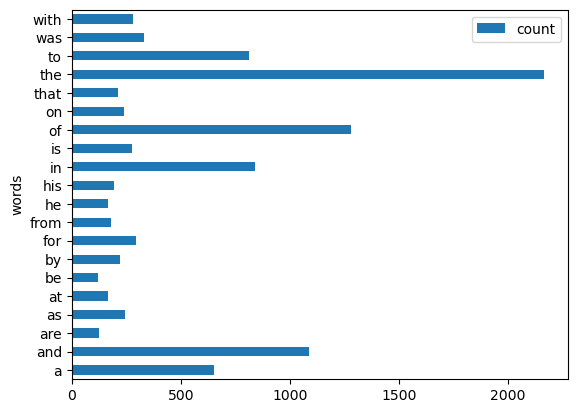

In [16]:
# Plot for most frequency stop word

word_freq.sort_values(by='words').plot.barh(x='words', y='count')
ax.set_title("Common Words Found")
plt.show()

In [17]:
# Remove the stop words, unwanted charaters and make lemmatization of words

stemmer = WordNetLemmatizer()
documents = []
for sen in range(0, len(paragraphs)):    
    document = re.sub(r'\W', ' ', str(paragraphs[sen])) # Remove all the special characters    
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document) # remove all single characters    
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) # Remove single characters from the start    
    document = re.sub(r'\s+', ' ', document, flags=re.I) # Substituting multiple spaces with single space    
    #document = re.sub(r'^b\s+', '', document) # Removing prefixed 'b'    
    document = document.lower() # Converting to Lowercase
    
    stopWords = set(stopwords.words('english'))
    words = word_tokenize(document)
    sent = []
    for w in words:
        if w not in stopWords:
            sent.append(w)

    # Lemmatization
    # document = document.split() 
    document = [stemmer.lemmatize(word) for word in sent]
    document = ' '.join(document)
    
    documents.append(document)

In [18]:
len(documents)
corpera = ''.join(documents)

In [19]:
documents[1]

'samsung cooky'

In [20]:
print(corpera)

get 5000 welcome voucher login download appsamsung cookysite us cooky clicking accept continuing browse site agreeing use cooky findchoose location languagegalaxy fold4 flip4let neo qled 8kbespoke refrigeratorsmartthingsfreestyle sound towercart emptysorry insufficient stock cartremove productwithout product applied coupon promotion code redeemed sure remove productprivacy policytick box proceed samsung comsamsung com service marketing information new product service announcement well special offer event newslettercheck preferencehelp u make recommendation updating product preferencelookingsuggested searchsuggestionsearch historyrelated searchmatched contentexperience live demomkbhd mkbhd studio refinement disclaimer tech reviewer share thought galaxy flip4 payment made create review license obtained fee content posted youtube availability model color may vary country carrier hear expert say galaxy flip4 unboxtherapy unbox therapy hold unfolded galaxy flip4 bora purple hand speaks quot